<a href="https://colab.research.google.com/github/marcin-tarka/notebooks/blob/main/playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [191]:
import torch
import numpy as np

In [192]:
xs = torch.arange(-10, 10.5, 0.2).unsqueeze(1)
ys = torch.sin(0.3*xs)+3

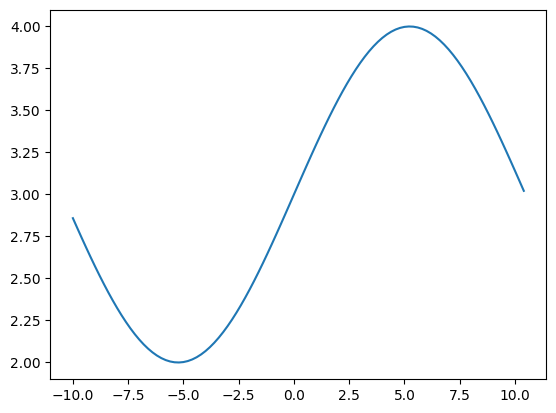

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xs,ys)
plt.show()

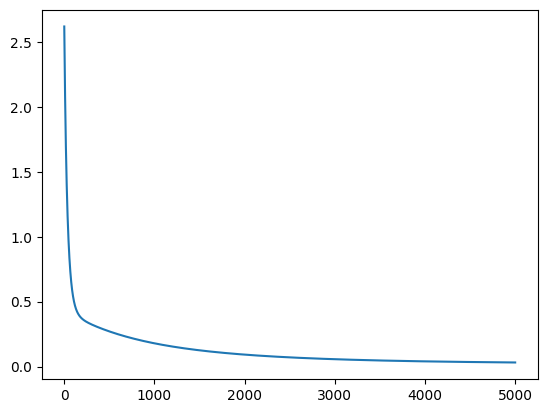

In [194]:
W1 = torch.randn((20, 1), requires_grad=True) #X neurons, one input
B1 = torch.randn((20, 1), requires_grad=True) #X neurons, one bias
W2 = torch.randn((1, 20), requires_grad=True) #Z neurons, X inputs
B2 = torch.randn((1, 1), requires_grad=True) #Z neurons, one bias
pred = None
losses = list()
for k in range(5000):
  W1.grad = None
  B1.grad = None
  W2.grad = None
  B2.grad = None
  layer1 =  (xs @ W1.T + B1.T).sigmoid()
  layer2 =  (layer1 @ W2.T + B2.T)
  pred = layer2
  loss = ((ys-pred)**2).mean(dim = 0)
  losses.append(loss.item())
  loss.backward()
  # update
  #print(W1.grad)
  W1.data += -0.001 * W1.grad
  B1.data += -0.001 * B1.grad
  W2.data += -0.001 * W2.grad
  B2.data += -0.001 * B2.grad
plt.plot(losses)
plt.show()

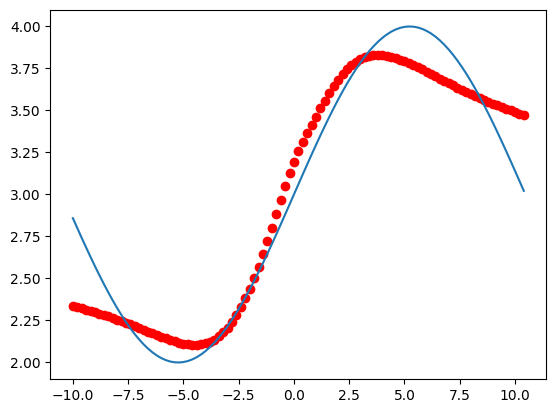

In [195]:
plt.plot(xs,ys)
plt.scatter(xs, pred.detach().numpy(), color='red')
plt.show()

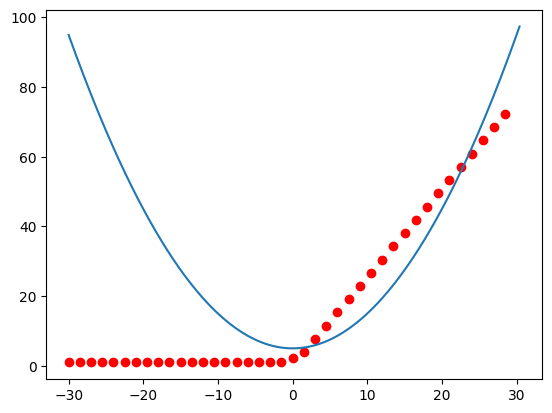

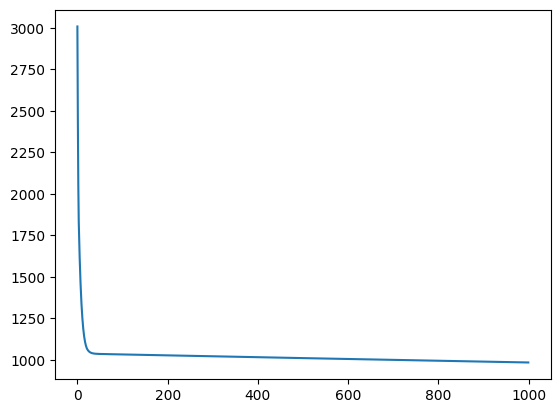

In [196]:
import torch

# Define the size of each layer
input_dim = 1
hidden_dim = 5
output_dim = 1

# Initialize weights and biases for the hidden layer
weights1 = torch.randn(input_dim, hidden_dim, requires_grad=True)
biases1 = torch.randn(hidden_dim, requires_grad=True)

# Initialize weights and biases for the output layer
weights2 = torch.randn(hidden_dim, output_dim, requires_grad=True)
biases2 = torch.randn(output_dim, requires_grad=True)

# Define a simple ? activation function
def activ(x):
    return x.relu()

# Define the model
def model(x):
    # Hidden layer
    x = torch.matmul(x, weights1) + biases1
    x = activ(x)
    # Output layer
    x = torch.matmul(x, weights2) + biases2
    return x

# Define the MSE loss function
def mse(t1, t2):
    return (t1 - t2).pow(2).mean()

# Generate some sample data
x = torch.arange(-30, 30.5, 0.2).unsqueeze(1)
y = 0.1*x.pow(2) + 5  # True output

losses = list()

learning_rate = 0.00005
# Train the model
for i in range(1000):
    # Forward pass
    pred = model(x)
    # Compute loss
    loss = mse(pred, y)
    losses.append(loss.item())
    # Backward pass
    loss.backward()

    # Update weights and biases
    with torch.no_grad():
        weights1 -= weights1.grad * learning_rate
        biases1 -= biases1.grad * learning_rate
        weights2 -= weights2.grad * learning_rate
        biases2 -= biases2.grad * learning_rate

        # Reset gradients
        weights1.grad.zero_()
        biases1.grad.zero_()
        weights2.grad.zero_()
        biases2.grad.zero_()

# Test the model
x_test = torch.arange(-30.0, 30.0, 1.5).unsqueeze(1)
y_pred = model(x_test)
plt.plot(x,y)
plt.scatter(x_test, y_pred.detach().numpy(), color='red')
plt.show()
plt.plot(losses)
plt.show()

In [197]:
a = torch.tensor([1,2,3])
b = torch.tensor([-5,-6,-7])
a-b

tensor([ 6,  8, 10])